In [2]:
import serial
import time
import numpy as np

#make sure arduino is running.need to restart kernel every time.

#connect to serial port, may need to change 
ser = serial.Serial('/dev/ttyACM1', baudrate=115200, timeout=5) 

# #send command to start
# val = input("Press a key to start data collection")
# ser.write(val.encode())

data_hist = []
num_steps = 62
timeperstep = 5
start = time.time()
#record data
print("Starting")
try:
    while (time.time() - start) < num_steps*timeperstep: 
        line = ser.readline().decode().strip() 
        valve_line = ser.readline().decode().strip() 
        data = [float(pressure) for pressure in line.split(',')] 
        valve_data = [float(cmd) for cmd in valve_line.split(',')] 
        data_hist.append(np.array([time.time(), data[0], valve_data[0]]))
except:
    # #close port
    ser.close()

data = np.array(data_hist)

import matplotlib.pyplot as plt


Starting


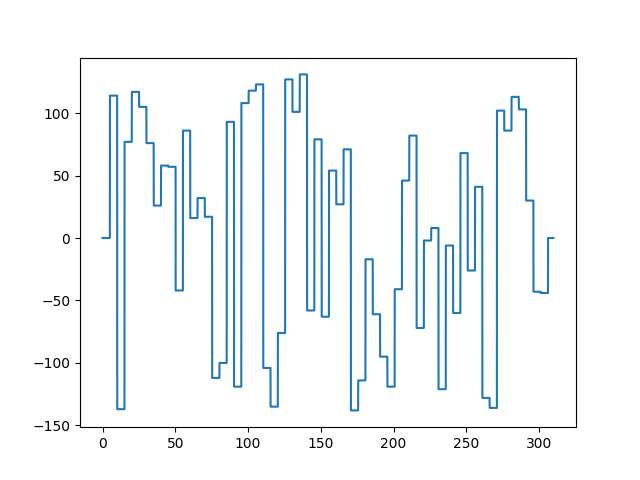

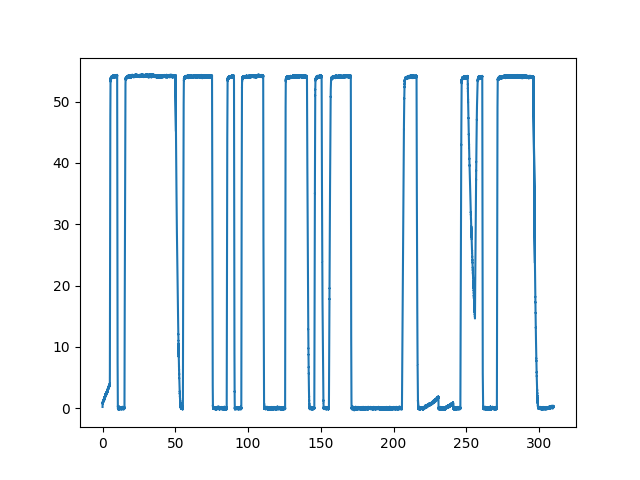

In [3]:
%matplotlib widget
plt.figure('Pressures')
plt.plot(data[:,0] - data[0,0], data[:,1])

plt.figure('Commands')
plt.plot(data[:,0] - data[0,0], data[:,2])
#save data and make sure to save with supply pressure.
plt.show()

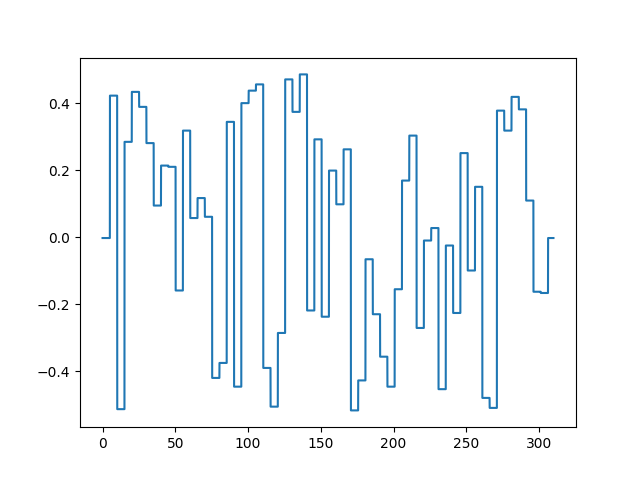

In [4]:
def cmd2current(cmds):
    #from data in excel sheet https://docs.google.com/spreadsheets/d/1BqAXwvAjkfid6SsaZTBB9igMHhnnO5GmFTYCt5eGMOI/edit#gid=0
    mA = 3.73 * cmds - 1.94
    return mA/1000

def current2area(i):
    #see onenote page. This function was from smax function in tassa paper with  U = .12 amps.
    #i is current in amps
    area_per = 56.8181818181818*np.sqrt((i - 0.12)**2 + 7.744e-5) + 56.8181818181818*np.sqrt((i + 0.12)**2 + 7.744e-5) - 13.6363636363636
    #return percentage of max orifice area
    return area_per


plt.figure('Current Command')
plt.plot(data[:,0] - data[0,0], cmd2current(data[:,2]))
plt.show()



In [5]:
import pandas as pd
data = pd.DataFrame(data)

#discharge coeff is often between .6 and .85 for orifice (https://en.wikipedia.org/wiki/Orifice_plate)

data[-1,0] - data[0,0]
np.diff(data[:,0])

KeyError: (-1, 0)

In [12]:
data.columns = ['Time', 'Pressure (psi)', 'Valve Command']
data['Time'] = data['Time'] - data['Time'][0]
data.head()


,Time,Pressure (psi),Valve Command
0,0.000000,0.18,0.0
1,0.000775,0.32,0.0
2,0.001574,0.42,0.0
3,0.002350,0.49,0.0
4,0.003126,0.51,0.0


In [20]:
#add current command column
#add orifice area column
current_cmds = data['Valve Command'].apply(cmd2current)
orifice_cmds = current_cmds.apply(current2area)

data['Current Command'] = current_cmds
data['Orifice Command'] = orifice_cmds
data.head()

,Time,Pressure (psi),Valve Command,Current Command,Orifice Command
0,0.000000,0.18,0.0,-0.00194,0.036627
1,0.000775,0.32,0.0,-0.00194,0.036627
2,0.001574,0.42,0.0,-0.00194,0.036627
3,0.002350,0.49,0.0,-0.00194,0.036627
4,0.003126,0.51,0.0,-0.00194,0.036627


In [1]:
data.plot()

NameError: name 'data' is not defined

In [22]:
data.to_csv('constant_volume_step_data.csv')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./constant_volume_step_data.csv')
data['Orifice Command'] = (np.sign(data['Current Command']) * data['Orifice Command'])/100.


In [11]:
data.head()


,Unnamed: 0,Time,Pressure (psi),Valve Command,Current Command,Orifice Command
0,0,0.000000,0.18,0.0,-0.00194,-0.000366
1,1,0.000775,0.32,0.0,-0.00194,-0.000366
2,2,0.001574,0.42,0.0,-0.00194,-0.000366
3,3,0.002350,0.49,0.0,-0.00194,-0.000366
4,4,0.003126,0.51,0.0,-0.00194,-0.000366


In [12]:
data.to_csv('constant_volume_step_data.csv')